## Second Model: Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

%matplotlib inline

In [7]:
#Load in the dataset
diabetes_df = pd.read_csv('/Users/sabrinasayed/Documents/Flatiron/Phase 3/Diabetes_Readmission_Classifier/Diabetes_Classifier_Project/Cleaned Data/cleaned_diabetes_data.csv', index_col=0)

In [8]:
diabetes_df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Unknown,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,Otherwise
1,Caucasian,Female,[10-20),1,1,7,3,Unknown,Unknown,59,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
2,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,Unknown,11,...,No,No,No,No,No,No,No,No,Yes,Otherwise
3,Caucasian,Male,[30-40),1,1,7,2,Unknown,Unknown,44,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
4,Caucasian,Male,[40-50),1,1,7,1,Unknown,Unknown,51,...,No,Steady,No,No,No,No,No,Ch,Yes,Otherwise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,Unknown,Unknown,50,...,No,Steady,No,No,No,No,No,Ch,Yes,Otherwise
101755,Other,Female,[40-50),1,1,7,14,MD,Unknown,73,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
101756,Other,Female,[60-70),1,1,7,2,MD,Unknown,46,...,No,Steady,No,No,No,No,No,No,Yes,Otherwise
101758,Caucasian,Female,[80-90),1,1,7,5,MC,Unknown,76,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise


In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69973 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69973 non-null  object
 1   gender                    69973 non-null  object
 2   age                       69973 non-null  object
 3   admission_type_id         69973 non-null  int64 
 4   discharge_disposition_id  69973 non-null  int64 
 5   admission_source_id       69973 non-null  int64 
 6   time_in_hospital          69973 non-null  int64 
 7   payer_code                69973 non-null  object
 8   medical_specialty         69973 non-null  object
 9   num_lab_procedures        69973 non-null  int64 
 10  num_procedures            69973 non-null  int64 
 11  num_medications           69973 non-null  int64 
 12  number_outpatient         69973 non-null  int64 
 13  number_emergency          69973 non-null  int64 
 14  number_inpatient          

Fix the data types of the categorical columns

In [10]:
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].astype('object')
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].astype('object')
diabetes_df['admission_type_id'] = diabetes_df['admission_type_id'].astype('object')


## Feature Selection

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


#Feature Selection
X = diabetes_df.drop(['readmitted'], axis=1)
y= diabetes_df['readmitted']

#Label encode target variable 'y' into numerics
labenc = LabelEncoder()
y = labenc.fit_transform(y)



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state = 42)

In [15]:
X_train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

Separate categorical and numerical features into variables

In [16]:
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_features


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [17]:
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
numerical_features


Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

## Building the Modeling Pipeling:

Steps:
1. Encode the categorical features
2. Scale the numerical features
3. Create the Logistic Regression model
4. Fit the model

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


### Encoding categorical data and scalign numerical data ###
preprocessor = ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(categories="auto", handle_unknown="ignore"), categorical_features), 
        ('ss', StandardScaler(), numerical_features)])

### Pipeline including encoding, scaling, and estimator
model_pipeline= Pipeline([('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(penalty='l2', class_weight='balanced', solver='lbfgs', max_iter=1000))])

model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamid...
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')),
                                                 ('ss', StandardScaler(),
                                                  Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [20]:
model_pipeline.score(X_train, y_train)

0.6790716286514605

## Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")

Cross-validation scores: [0.66320503 0.64977134 0.6521532  0.6633003  0.65316818]


In [23]:
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

Average CV score: 0.656 (+/- 0.012)


In [24]:
y_pred = model_pipeline.predict(X_test)


In [19]:
model_pipeline.score(X_test, y_test)

0.6621698868183377

## Initial Model Evaluation

In [26]:
# Feature weights
model_pipeline.named_steps['classifier'].coef_

array([[-0.01286152, -0.0274001 , -0.05187377, ..., -0.07299018,
        -0.19526214, -0.05710443]])

In [27]:
model_pipeline.named_steps['classifier'].intercept_

array([0.70163581])

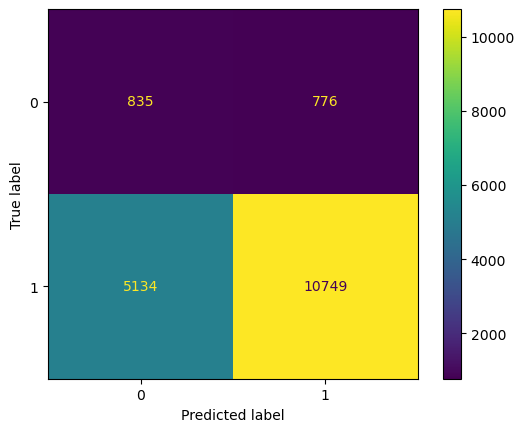

In [28]:
cfmat = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(model_pipeline, X_test, y_test)

plt.savefig('Second_Model_CFMAT.png')

In [29]:
from sklearn.metrics import precision_score

precision = precision_score(y_test,y_pred)
precision

0.9326681127982647

In [30]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.6767613171315243

In [31]:
accuracy_score(y_test, y_pred)

0.6621698868183377

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.52      0.22      1611
           1       0.93      0.68      0.78     15883

    accuracy                           0.66     17494
   macro avg       0.54      0.60      0.50     17494
weighted avg       0.86      0.66      0.73     17494



## Hypertuning the Model

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for both preprocessor and classifier
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'classifier__max_iter': [1000, 2000] # Try different class weights
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    model_pipeline,
    param_grid,
    cv=5,
    scoring='f1',  
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....classifier__C=0.001, classifier__max_iter=1000; total time=   2.3s
[CV] END .....classifier__C=0.001, classifier__max_iter=1000; total time=   2.3s
[CV] END .....classifier__C=0.001, classifier__max_iter=1000; total time=   2.3s
[CV] END .....classifier__C=0.001, classifier__max_iter=1000; total time=   2.3s
[CV] END .....classifier__C=0.001, classifier__max_iter=1000; total time=   2.1s
[CV] END .....classifier__C=0.001, classifier__max_iter=2000; total time=   2.1s
[CV] END .....classifier__C=0.001, classifier__max_iter=2000; total time=   2.3s
[CV] END .....classifier__C=0.001, classifier__max_iter=2000; total time=   2.2s
[CV] END .....classifier__C=0.001, classifier__max_iter=2000; total time=   5.0s
[CV] END .....classifier__C=0.001, classifier__max_iter=2000; total time=   5.2s
[CV] END ......classifier__C=0.01, classifier__max_iter=1000; total time=   5.8s
[CV] END ......classifier__C=0.01, classifier__m

In [38]:
model_pipeline = grid_search.best_estimator_
model_pipeline.score(X_test, y_test)


0.9079684463244541

In [39]:

y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1611
           1       0.91      1.00      0.95     15883

    accuracy                           0.91     17494
   macro avg       0.95      0.50      0.48     17494
weighted avg       0.92      0.91      0.86     17494



The model that was tuned via gridsearchCV ended up overfitting to the majority class. Given that it cannot identify the minority class at all and it has a score of 1 for precision of the majority class, it is not a good model for this dataset.


# Official Evaluation of Second Model:

This model performed a lot worse than I expected it to. The performance scores were worse than the baseline model. It ended up overfitting to the majority class completely and without tuning it is not any better at predicting the minority class than the baseline model.

# Next Steps

For my next step, I want to go back to using a Decision Tree Classifier because I think it is better at handling a lot of features with complex non-linear relationships.  I will do some major feature reduction and bin some feature categories to reduce cardinality and dimensionality. I also will try different techniques to help the model recognize the minority class better.